In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
path_data = "data/"
path_train = path_data + "train.csv"
path_test = path_data + "test.csv"
path_building = path_data + "building_metadata.csv"
path_weather_train = path_data + "weather_train.csv"
path_weather_test = path_data + "weather_test.csv"
print(path_train)

data/train.csv


In [5]:
measurements = pd.read_csv(path_train)

buildings = pd.read_csv(path_building)

weather  = pd.read_csv(path_weather_train)

In [6]:
measurements

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [7]:
buildings

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [8]:
weather

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [149]:
# Getting the feeling for the data. Checking an examplary building

In [9]:
x = measurements.groupby(['building_id', 'meter']).count().groupby(['building_id']).count()
x[x['timestamp'] == 4]

,timestamp,meter_reading
building_id,,
1232,4,4
1241,4,4
1249,4,4
1258,4,4
1259,4,4
1293,4,4
1294,4,4
1295,4,4
1296,4,4


In [11]:
buildings[buildings['building_id'] == 1331]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1331,15,1331,Education,171008,1930.0,NaN


In [12]:
one_building_day = measurements[(measurements['building_id'] == 1331) & (measurements['timestamp'].str.startswith('2016-07-15'))]

In [15]:
one_building_day

,building_id,meter,timestamp,meter_reading
10687506,1331,0,2016-07-15 00:00:00,196.7750
10687507,1331,1,2016-07-15 00:00:00,45.2066
10687508,1331,2,2016-07-15 00:00:00,124.1290
10687509,1331,3,2016-07-15 00:00:00,1501.9600
10689855,1331,0,2016-07-15 01:00:00,200.1500
...,...,...,...,...
10739198,1331,3,2016-07-15 22:00:00,1539.7300
10741545,1331,0,2016-07-15 23:00:00,203.2500
10741546,1331,1,2016-07-15 23:00:00,43.9453
10741547,1331,2,2016-07-15 23:00:00,180.5280


In [14]:
one_building_day.groupby(['meter']).count()

,building_id,timestamp,meter_reading
meter,,,
0,24,24,24
1,24,24,24
2,24,24,24
3,24,24,24


In [17]:
one_building_day

,building_id,meter,timestamp,meter_reading
10687506,1331,0,2016-07-15 00:00:00,196.7750
10687507,1331,1,2016-07-15 00:00:00,45.2066
10687508,1331,2,2016-07-15 00:00:00,124.1290
10687509,1331,3,2016-07-15 00:00:00,1501.9600
10689855,1331,0,2016-07-15 01:00:00,200.1500
...,...,...,...,...
10739198,1331,3,2016-07-15 22:00:00,1539.7300
10741545,1331,0,2016-07-15 23:00:00,203.2500
10741546,1331,1,2016-07-15 23:00:00,43.9453
10741547,1331,2,2016-07-15 23:00:00,180.5280


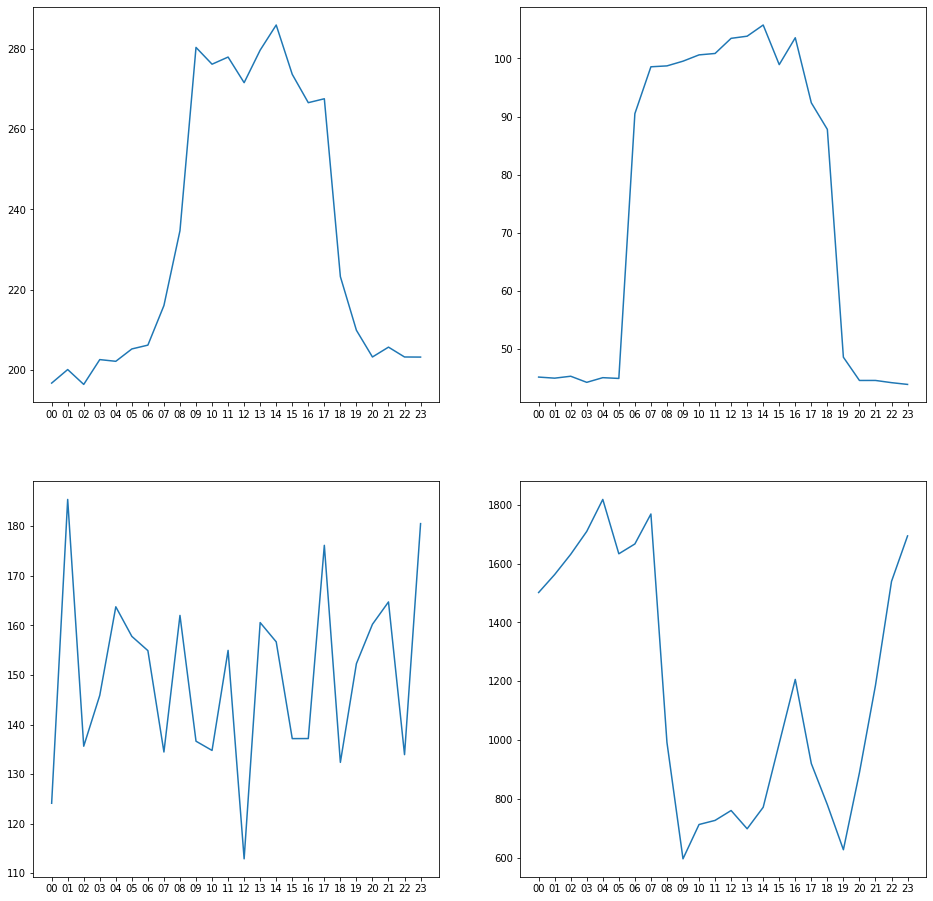

In [18]:
one_building_day_meter0 = one_building_day[one_building_day['meter'] == 0]
one_building_day_meter1 = one_building_day[one_building_day['meter'] == 1]
one_building_day_meter2 = one_building_day[one_building_day['meter'] == 2]
one_building_day_meter3 = one_building_day[one_building_day['meter'] == 3]

fig = plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.plot(one_building_day_meter0['timestamp'].str[11:13], one_building_day_meter0['meter_reading'], '-')
plt.subplot(2, 2, 2)
plt.plot(one_building_day_meter1['timestamp'].str[11:13], one_building_day_meter1['meter_reading'], '-')
plt.subplot(2, 2, 3)
plt.plot(one_building_day_meter2['timestamp'].str[11:13], one_building_day_meter2['meter_reading'], '-')
plt.subplot(2, 2, 4)
plt.plot(one_building_day_meter3['timestamp'].str[11:13], one_building_day_meter3['meter_reading'], '-')

In [19]:
one_site_day = weather[(weather['site_id'] == 15) & (weather['timestamp'].str.startswith('2016-07-15'))]

In [20]:
one_site_day

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
135805,15,2016-07-15 00:00:00,29.4,0.0,17.2,NaN,1008.8,250.0,5.1
135806,15,2016-07-15 01:00:00,26.7,2.0,17.2,NaN,1009.0,250.0,3.1
135807,15,2016-07-15 02:00:00,27.2,NaN,16.7,NaN,1009.5,250.0,3.1
135808,15,2016-07-15 03:00:00,25.0,0.0,17.2,NaN,1010.0,270.0,4.1
135809,15,2016-07-15 04:00:00,20.6,0.0,17.2,NaN,1010.3,130.0,2.1
135810,15,2016-07-15 05:00:00,18.9,0.0,16.7,NaN,1010.7,0.0,0.0
135811,15,2016-07-15 06:00:00,18.3,0.0,17.2,NaN,1010.5,50.0,2.1
135812,15,2016-07-15 07:00:00,18.3,0.0,17.2,NaN,1010.2,90.0,1.5
135813,15,2016-07-15 08:00:00,17.2,0.0,16.7,NaN,1010.5,70.0,1.5
135814,15,2016-07-15 09:00:00,17.8,0.0,16.7,NaN,1010.7,0.0,0.0


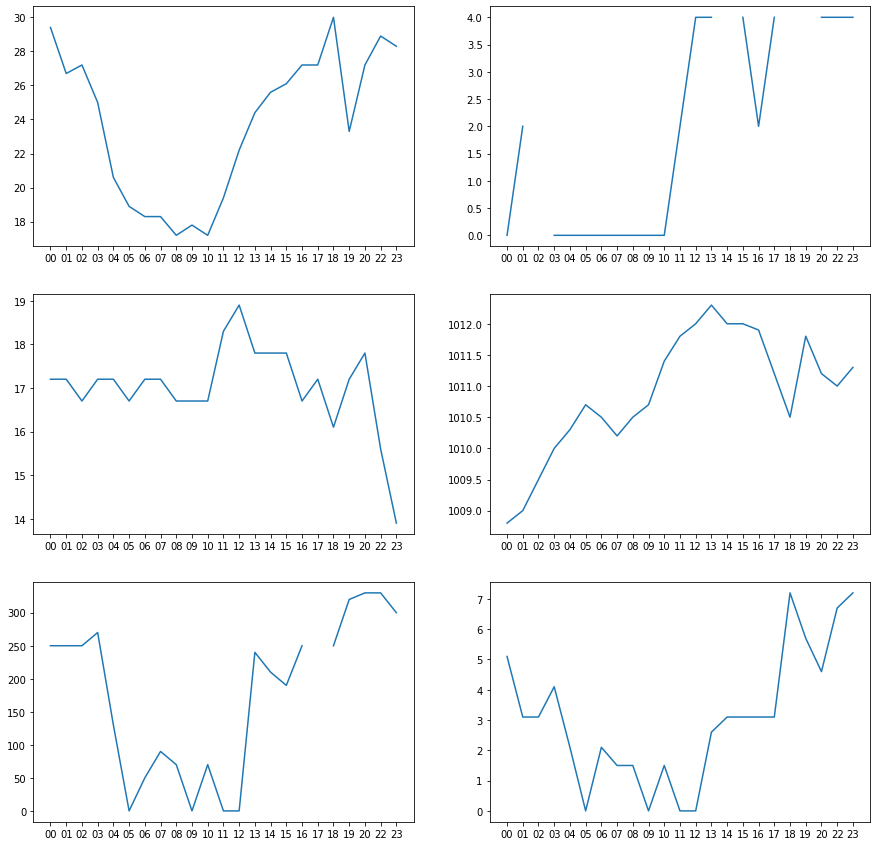

In [27]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
plt.plot(one_site_day['timestamp'].str[11:13], one_site_day['air_temperature'], '-')
plt.subplot(3, 2, 2)
plt.plot(one_site_day['timestamp'].str[11:13], one_site_day['cloud_coverage'], '-')
plt.subplot(3, 2, 3)
plt.plot(one_site_day['timestamp'].str[11:13], one_site_day['dew_temperature'], '-')
plt.subplot(3, 2, 4)
plt.plot(one_site_day['timestamp'].str[11:13], one_site_day['sea_level_pressure'], '-')
plt.subplot(3, 2, 5)
plt.plot(one_site_day['timestamp'].str[11:13], one_site_day['wind_direction'], '-')
plt.subplot(3, 2, 6)
plt.plot(one_site_day['timestamp'].str[11:13], one_site_day['wind_speed'], '-')

#### Checking the weather data

In [10]:
weather.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64